## Images from OFIQ results

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cv2

In [3]:

def Unified_quality_score(data_path):
    # Load the dataset
    df = pd.read_csv(data_path, sep=';')

    # Histograms for scalar scores
    scalar_columns = ['UnifiedQualityScore.scalar']
    df[scalar_columns].hist(bins=20, figsize=(20, 15))
    plt.suptitle('Histograms of Scalar Scores')
    plt.show()


    # Improved Box plots for raw scores with Seaborn
    raw_columns = ['UnifiedQualityScore']
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df[raw_columns], palette="Set2")
    plt.xticks(rotation=45)
    plt.title('Box Plots of UnifiedQualityScore')
    plt.show()

    # # Scatter plot
    # plt.figure(figsize=(10, 6))
    # sns.scatterplot(x='UnifiedQualityScore', y='Sharpness', data=df, hue='Sharpness', palette='coolwarm', size='Sharpness', sizes=(20, 200))
    # plt.title('Scatter Plot of Unified Quality Score')
    # plt.show()


    # Additional plots can be added based on specific needs or interests


### Show both sides of top 50% of data

In [4]:
data_path_children = '../..//data/OFIQ_results/adults_all_final.csv'


In [5]:
df = pd.read_csv(data_path_children, sep=';')

In [6]:
df.drop_duplicates(subset=['UnifiedQualityScore', "BackgroundUniformity", "IlluminationUniformity", "LuminanceMean"], inplace=True)

In [7]:
def id_class(im_enter):
    if "." in im_enter[:-4]:
        im = im_enter.split("_")[0]
    else:
        im = "_".join(im_enter.split("_")[:2])
    return im

In [8]:
# Convert file names to ID
df['full_img_name'] = df['Filename'].apply(lambda x: x.split('/')[-1])
df['ID'] = df['Filename'].apply(lambda x: x.split('/')[-1][:-4])
df['id_class'] = df['full_img_name'].apply(lambda x: id_class(x))

In [9]:
# THRESHOLD 50th percentile
df_uni_50_quantile = df["UnifiedQualityScore.scalar"].quantile(0.5)

In [10]:
df_canonical = df[df["UnifiedQualityScore.scalar"] > df_uni_50_quantile].sort_values(by="UnifiedQualityScore.scalar", ascending=True)
df_canonical["UnifiedQualityScore.scalar"].describe()

count    1610.000000
mean       65.344099
std        13.970834
min        43.000000
25%        53.000000
50%        65.000000
75%        77.000000
max        97.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [11]:
df_canonical

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,full_img_name,ID,id_class
2015,../../../data/tests/images/adult_final_first_1...,22.293465,58.131858,0.439853,0.193578,0.006803,0.122917,0.000000,6.384278,-17,...,5,96,98,100,21,100,NaN,m.03by79_0001.jpg,m.03by79_0001,m.03by79
2394,../../../data/tests/images/adult_final_first_3...,22.245501,26.757327,0.408305,0.256897,0.022816,0.191600,0.000000,7.120854,-30,...,4,100,99,100,69,100,NaN,m.04n24yj_0004.jpg,m.04n24yj_0004,m.04n24yj
1187,../../../data/tests/images/adult_final_firmid_...,22.297331,137.062642,0.000918,0.118224,0.018585,0.676505,0.000000,5.899215,-38,...,16,87,88,99,45,0,NaN,m.0g9wxh6_0002.jpg,m.0g9wxh6_0002,m.0g9wxh6
1158,../../../data/tests/images/adult_final_firmid_...,22.262592,7.498457,0.414141,0.132763,0.003527,0.281117,0.000000,5.916429,-28,...,1,94,99,100,32,0,NaN,m.0g2rwz_0001.jpg,m.0g2rwz_0001,m.0g2rwz
1433,../../../data/tests/images/adult_final_firmid_...,22.283043,104.088648,0.397503,0.211019,0.012874,0.202276,0.000000,6.669523,-20,...,2,74,93,98,79,100,NaN,m.0hr105c_0001.jpg,m.0hr105c_0001,m.0hr105c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
160,../../../data/tests/images/adult_final_last/m....,31.274513,45.201796,0.137695,0.276270,0.024240,0.162168,0.000000,7.198341,-39,...,1,79,98,99,95,0,NaN,m.0765gs_0003.jpg,m.0765gs_0003,m.0765gs
1993,../../../data/tests/images/adult_final_first_1...,30.972631,135.142941,0.426997,0.293032,0.041996,0.175304,0.000000,7.446661,-37,...,4,100,97,100,78,100,NaN,m.02z42rj_0003.jpg,m.02z42rj_0003,m.02z42rj
1744,../../../data/tests/images/adult_final_first/m...,31.006723,70.914105,0.665748,0.070850,0.005402,0.795077,0.000000,5.483150,-47,...,1,100,98,100,55,0,NaN,m.09g86wb_0005.jpg,m.09g86wb_0005,m.09g86wb
2772,../../../data/tests/images/adult_final_first_4...,31.308905,75.856629,0.287197,0.432118,0.031689,0.031185,0.000564,7.498281,-45,...,5,95,100,100,90,100,NaN,m.06znml3_0004.jpg,m.06znml3_0004,m.06znml3


In [12]:
df_non_canonical = df[df["UnifiedQualityScore.scalar"] <= df_uni_50_quantile].sort_values(by="UnifiedQualityScore.scalar", ascending=True)
df_non_canonical["UnifiedQualityScore.scalar"].describe()


count    1667.000000
mean       22.181164
std        10.984145
min         1.000000
25%        13.000000
50%        22.000000
75%        32.000000
max        42.000000
Name: UnifiedQualityScore.scalar, dtype: float64

In [13]:
df_non_canonical

,Filename,UnifiedQualityScore,BackgroundUniformity,IlluminationUniformity,LuminanceMean,LuminanceVariance,UnderExposurePrevention,OverExposurePrevention,DynamicRange,Sharpness,...,UpwardCropOfTheFaceImage.scalar,HeadPoseYaw.scalar,HeadPosePitch.scalar,HeadPoseRoll.scalar,ExpressionNeutrality.scalar,NoHeadCoverings.scalar,Unnamed: 57,full_img_name,ID,id_class
201,../../../data/tests/images/adult_final_firmid/...,11.774984,45.119782,0.020000,0.033207,0.001791,0.838340,0.0,4.250564,-3,...,63,34,98,92,56,100,NaN,m.01flf5_0003.jpg,m.01flf5_0003,m.01flf5
3362,../../../data/tests/images/adult_final_mid/m.0...,12.832454,158.278357,0.269841,0.301102,0.017390,0.021549,0.0,6.958013,-32,...,0,29,98,100,51,100,NaN,m.072bxj_0002.jpg,m.072bxj_0002,m.072bxj
869,../../../data/tests/images/adult_final_firmid_...,13.219610,67.111515,0.680796,0.207751,0.017005,0.157514,0.0,6.759810,-12,...,26,86,90,97,62,100,NaN,m.0fnz3z_0003.jpg,m.0fnz3z_0003,m.0fnz3z
1999,../../../data/tests/images/adult_final_first_1...,13.082006,25.892179,0.569527,0.062970,0.001300,0.808378,0.0,5.076859,-29,...,1,79,90,95,42,0,NaN,m.02z73t4_0001.jpg,m.02z73t4_0001,m.02z73t4
1595,../../../data/tests/images/adult_final_first/m...,13.612414,117.971792,0.421769,0.247695,0.011031,0.225059,0.0,6.506086,-4,...,0,28,94,98,57,100,NaN,m.012prx_0001.jpg,m.012prx_0001,m.012prx
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,../../../data/tests/images/adult_final_last/m....,22.212959,136.324861,0.498615,0.131805,0.004927,0.377939,0.0,5.654466,-2,...,7,99,100,100,68,100,NaN,m.07997q_0002.jpg,m.07997q_0002,m.07997q
184,../../../data/tests/images/adult_final_last/m....,22.183558,22.409239,0.593469,0.260032,0.025078,0.202997,0.0,7.140658,-37,...,4,92,87,99,32,100,NaN,m.0928zf_0004.jpg,m.0928zf_0004,m.0928zf
3388,../../../data/tests/images/adult_final_mid/m.0...,22.116951,82.784182,0.085399,0.078641,0.003567,0.690166,0.0,5.580984,-39,...,1,98,97,99,38,100,NaN,m.078wwr_0001.jpg,m.078wwr_0001,m.078wwr
2583,../../../data/tests/images/adult_final_first_3...,22.198534,3.759194,0.000000,0.154397,0.010875,0.401947,0.0,6.315651,-19,...,7,95,98,100,88,100,NaN,m.05p5sc3_0003.jpg,m.05p5sc3_0003,m.05p5sc3


In [14]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

def display_images(image_names, directory, num_cols=5, title=None):
    num_images = len(image_names)
    num_rows = (num_images + num_cols - 1) // num_cols

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 3*num_rows))

    for i, image_name in enumerate(image_names):
        row = i // num_cols
        col = i % num_cols

        # Search for the image recursively in the directory
        for root, dirs, files in os.walk(directory):
            if image_name in files:
                # Construct the full path to the image
                image_path = os.path.join(root, image_name)

                # Display the image
                img = mpimg.imread(image_path)
                axes[row, col].imshow(img)
                axes[row, col].set_title(image_name)
                axes[row, col].axis('off')
                break
        else:
            print(f"Image '{image_name}' not found in directory '{directory}'.")

    # Hide any unused subplots
    for i in range(num_images, num_rows*num_cols):
        row = i // num_cols
        col = i % num_cols
        axes[row, col].axis('off')

    #plt.tight_layout()
    fig.suptitle(title)
    plt.show()

scores [43, 43, 43, 43, 43, 43, 43, 43, 43, 43]


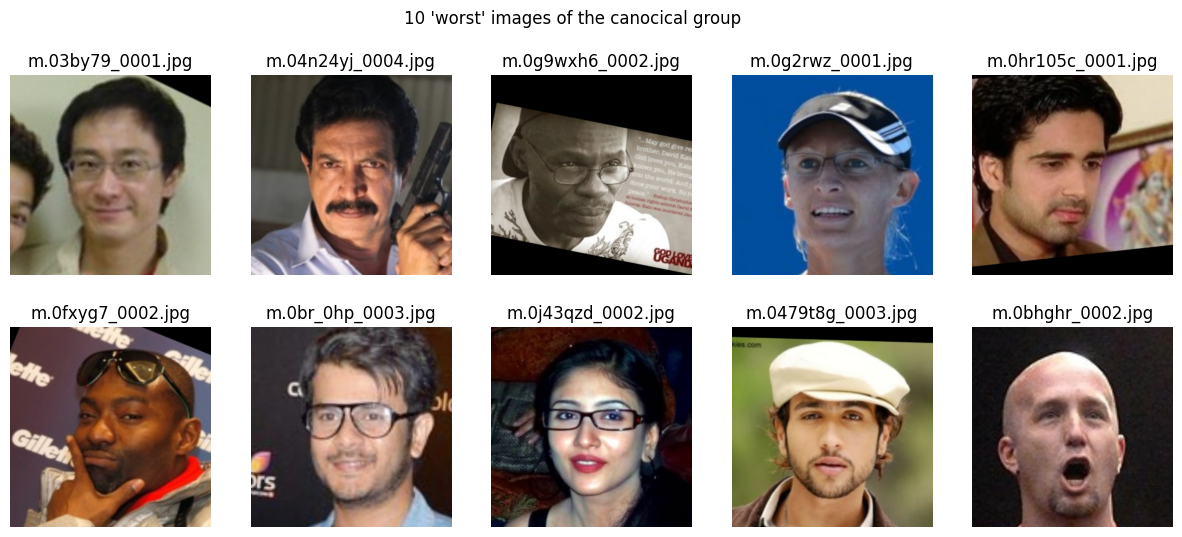

In [16]:
top_score_faces = list(df_canonical["full_img_name"].head(10))
top_score_ids = list(df_canonical["id_class"].head(10))

# usage top score
image_names = top_score_faces
# directory = '../../data/raw_full/children'
directory = '../../data/raw_full/adults'
print("scores", list(df_canonical["UnifiedQualityScore.scalar"].head(10)))

display_images(image_names, directory, title="10 'worst' images of the canocical group")


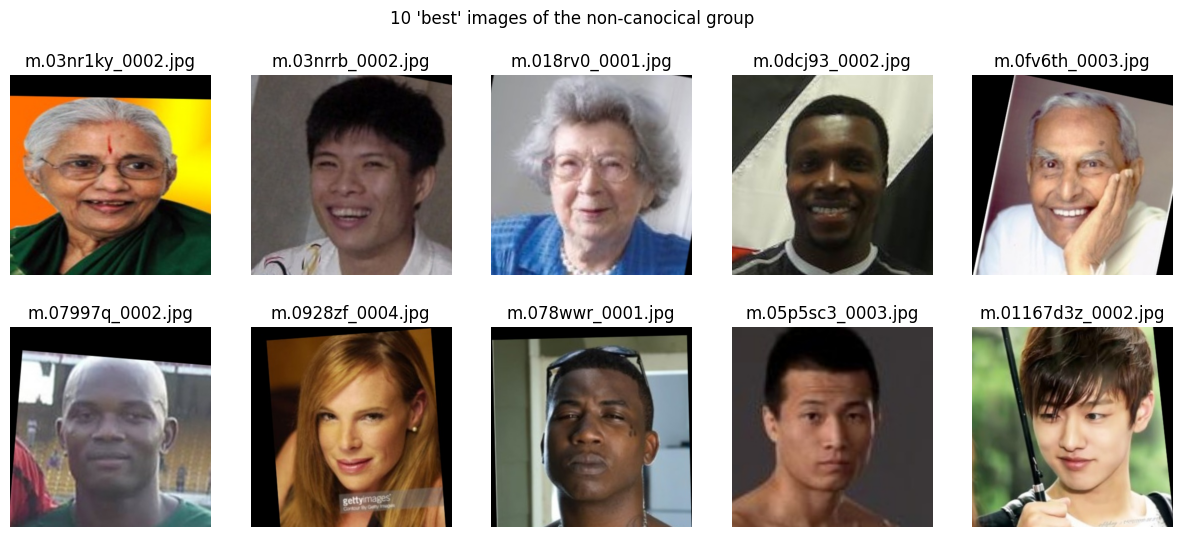

scores [42, 42, 42, 42, 42, 42, 42, 42, 42, 42]


In [17]:
# Example usage
# Get top 50% + 10 of the data
top_score_faces = list(df_non_canonical["full_img_name"].tail(10))
top_score_ids = list(df_non_canonical["id_class"].tail(10))


image_names = top_score_faces
# directory = '../../data/raw_full/children'
directory = '../../data/raw_full/adults'

display_images(image_names, directory, title="10 'best' images of the non-canocical group")
print("scores", list(df_non_canonical["UnifiedQualityScore.scalar"].tail(10)))


In [18]:
# Get top 10 of the data with lowest unified quality score
df_low10 = df_sorted.head(10).reset_index(drop=True)
top_low_score_faces = list(df_low10["full_img_name"])

NameError: name 'df_sorted' is not defined

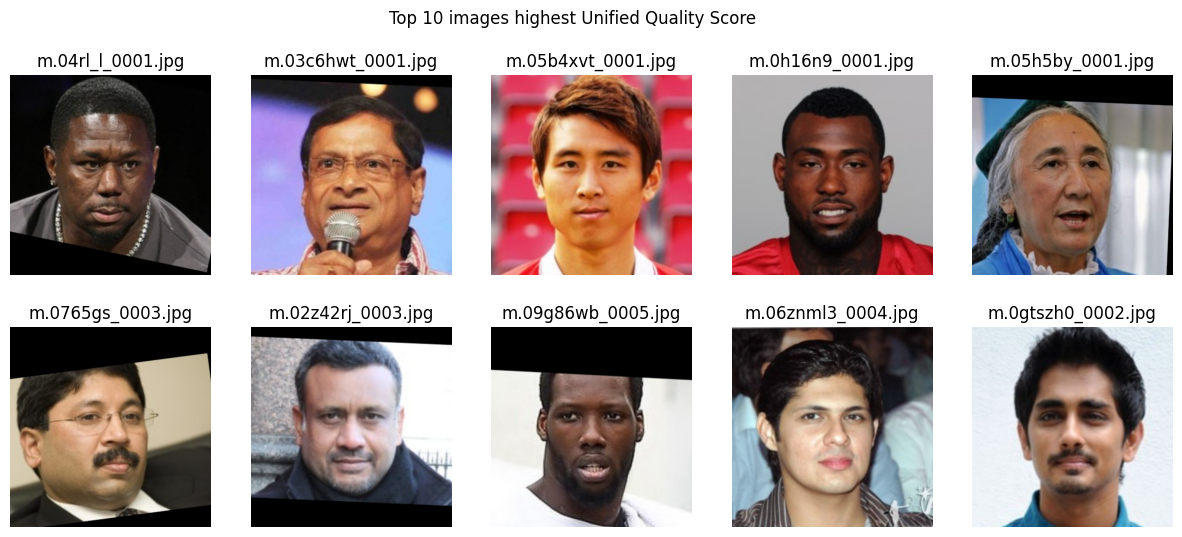

scores [95, 95, 95, 95, 96, 96, 96, 96, 96, 97]


In [19]:
# Example usage

# Get top lowest 10 of the data
high_score_faces = list(df_canonical["full_img_name"].tail(10))
high_score_ids = list(df_canonical["id_class"].tail(10))



image_names = high_score_faces
# directory = '../../data/raw_full/children'
directory = '../../data/raw_full/adults'


display_images(image_names, directory, title="Top 10 images highest Unified Quality Score")
print("scores", list(df_canonical["UnifiedQualityScore.scalar"].tail(10)))

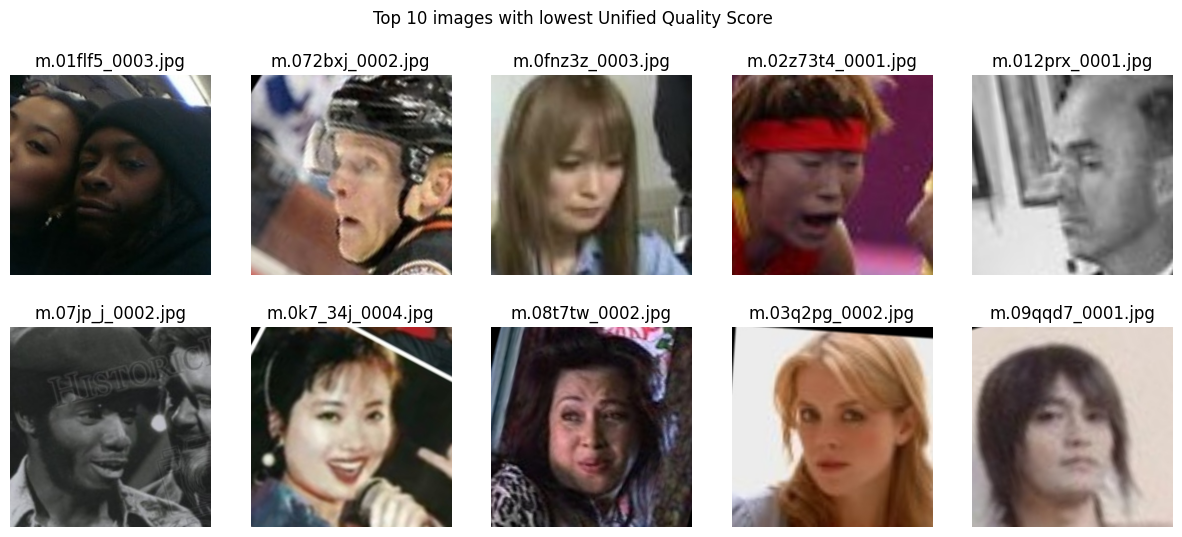

scores [1, 2, 2, 2, 3, 3, 3, 3, 3, 3]


In [20]:
# Example usage

# Get top lowest 10 of the data
low_score_faces = list(df_non_canonical["full_img_name"].head(10))
low_score_ids = list(df_non_canonical["id_class"].head(10))



image_names = low_score_faces
# directory = '../../data/raw_full/children'
directory = '../../data/raw_full/adults'

display_images(image_names, directory, title="Top 10 images with lowest Unified Quality Score")
print("scores", list(df_non_canonical["UnifiedQualityScore.scalar"].head(10)))


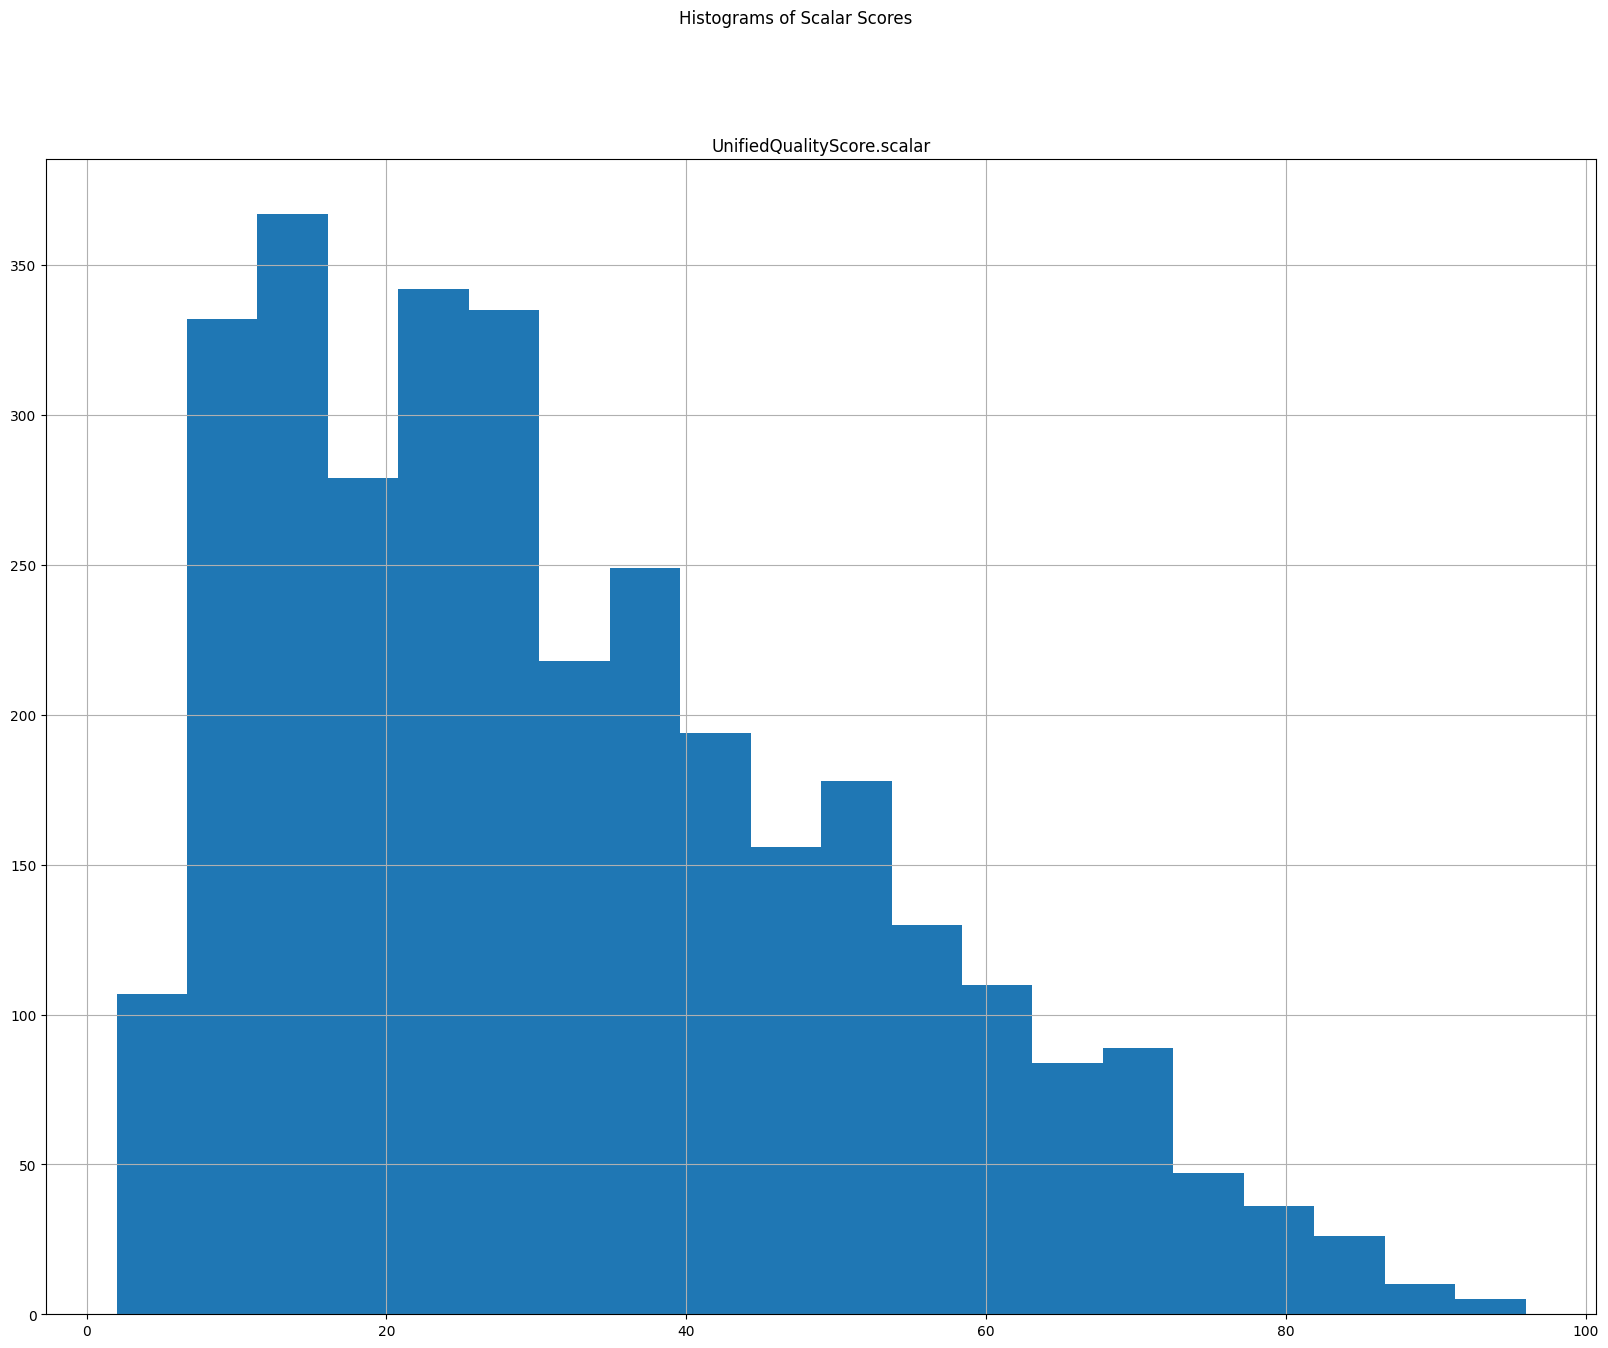

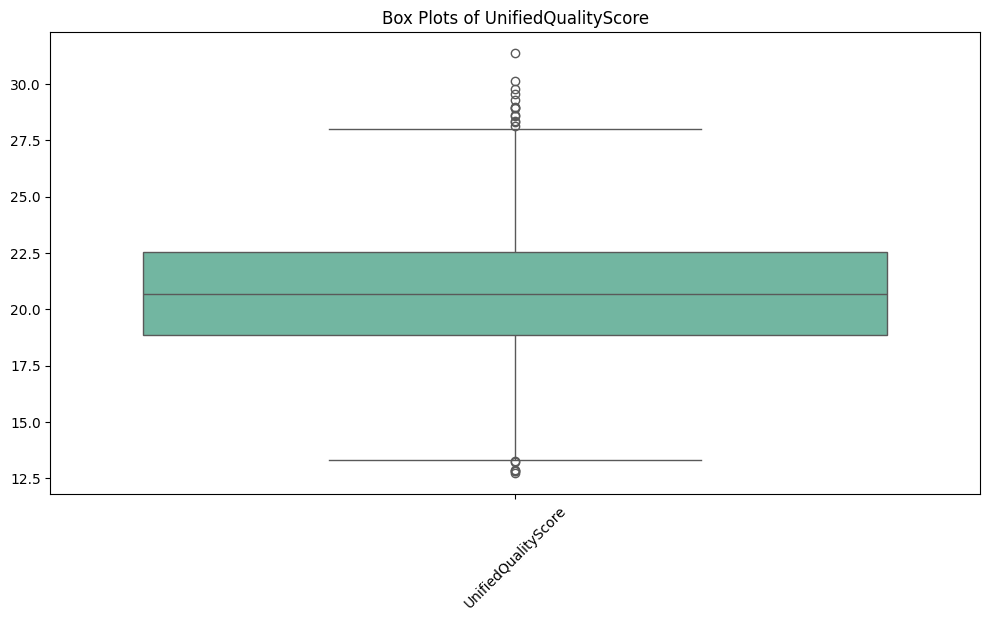

In [ ]:
data_path_children = '../..//data/OFIQ_results/children_all_final.csv'

# descriptive_plots_individual(data_path_children)
Unified_quality_score(data_path_children)